In [1]:
%matplotlib inline
import numpy as np
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import os
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [9]:
list_tcHW = []
list_SM = []
for name in sorted(os.listdir('500GeV_res/csv/'),reverse=True):
    if name.split('_')[-1] != '0.0.csv' and name.split('_')[1] == '0.0':
        filename = '500GeV_res/csv/' + name
        df = pd.read_csv(filename, delimiter= ' ')
        list_tcHW.append(df)
    elif name.split('_')[-1] == '0.0.csv' and name.split('_')[1] == '0.0':
        filename = '500GeV_res/csv/' + name
        df = pd.read_csv(filename, delimiter= ' ')
        list_SM.append(df)

In [18]:
list_tcHW[5].head()

,Eta_H,M_H,PT_ZH,PT_b1,PT_b2,Cos_Hb1,PT_l2,tcHW,PT_l1,cHW,PT_j1,PT_j2,M_Z,Cos_lZ,PT_H,PT_ll,DPHI_ll,phi_H,M_ZH,xsec
0,0.443965,111.057205,9.059669,383.902802,61.603054,0.682648,186.907166,-0.066667,262.886841,0.0,0.0,0.0,91.570030,0.202517,435.798309,441.690186,0.385835,-1.213758,988.507996,0.006028
1,-0.398395,103.349983,91.364845,322.983704,42.886105,0.667697,64.498192,-0.066667,395.472809,0.0,0.0,0.0,93.491730,0.668996,365.823914,457.178070,0.318238,0.769336,902.395020,0.006028
2,0.049182,106.966377,95.501160,320.781067,63.032467,0.668059,73.186508,-0.066667,403.499817,0.0,0.0,0.0,91.386642,0.674655,379.933411,475.311554,0.210912,-1.817767,875.159302,0.006028
3,0.721019,129.076675,15.814312,247.286438,166.003433,0.102539,117.669830,-0.066667,272.027283,0.0,0.0,0.0,95.980774,0.482377,397.865570,382.575043,0.417550,-2.543832,1019.533447,0.006028
4,-0.781975,121.587837,1.937038,360.389832,21.146715,0.840733,58.915600,-0.066667,320.950562,0.0,0.0,0.0,93.960251,0.729235,367.485779,368.817871,0.674088,0.868725,997.984497,0.006028


In [19]:
tcHW_0d2_df = list_tcHW[0]
tcHW_0d13_df = list_tcHW[1]
tcHW_0d06_df = list_tcHW[2]
tcHW_m0d2_df = list_tcHW[3]
tcHW_m0d13_df = list_tcHW[4]
tcHW_m0d06_df = list_tcHW[5]

In [20]:
#cHW_df = pd.concat(list_cHW,ignore_index=True)
SM_df = pd.concat(list_SM,ignore_index=True)

In [21]:
tcHW_0d2_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
tcHW_0d13_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
tcHW_0d06_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
tcHW_m0d2_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
tcHW_m0d13_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
tcHW_m0d06_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)

In [22]:
SM_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)

In [23]:
y_tcHW_0d2 = np.concatenate((np.ones(tcHW_0d2_df.shape[0]), np.zeros(SM_df.shape[0])))
y_tcHW_0d13 = np.concatenate((np.ones(tcHW_0d13_df.shape[0]), np.zeros(SM_df.shape[0])))
y_tcHW_0d06 = np.concatenate((np.ones(tcHW_0d06_df.shape[0]), np.zeros(SM_df.shape[0])))
y_tcHW_m0d2 = np.concatenate((np.ones(tcHW_m0d2_df.shape[0]), np.zeros(SM_df.shape[0])))
y_tcHW_m0d13 = np.concatenate((np.ones(tcHW_m0d13_df.shape[0]), np.zeros(SM_df.shape[0])))
y_tcHW_m0d06 = np.concatenate((np.ones(tcHW_m0d06_df.shape[0]), np.zeros(SM_df.shape[0])))

In [24]:
X_0d2 = pd.concat([tcHW_0d2_df, SM_df], ignore_index=True)
X_0d13 = pd.concat([tcHW_0d13_df, SM_df], ignore_index=True)
X_0d06 = pd.concat([tcHW_0d06_df, SM_df], ignore_index=True)
X_m0d2 = pd.concat([tcHW_m0d2_df, SM_df], ignore_index=True)
X_m0d13 = pd.concat([tcHW_m0d13_df, SM_df], ignore_index=True)
X_m0d06 = pd.concat([tcHW_m0d06_df, SM_df], ignore_index=True)

In [25]:
from sklearn import preprocessing
scale = StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [26]:
for i in [X_0d2, X_0d13, X_0d06, 
         X_m0d2, X_m0d13, X_m0d06]:
    i = scaleColumns(i,['Eta_H', 'M_H', 'PT_ZH',
                    'PT_b1', 'PT_b2', 'Cos_Hb1', 
                    'PT_l2', 'PT_l1', 'M_Z', 
                    'Cos_lZ', 'PT_H', 'PT_ll', 
                    'DPHI_ll', 'phi_H','M_ZH'])

In [27]:
X_0d2.head()

,Eta_H,M_H,PT_ZH,PT_b1,PT_b2,Cos_Hb1,PT_l2,PT_l1,M_Z,Cos_lZ,PT_H,PT_ll,DPHI_ll,phi_H,M_ZH
0,0.450500,0.452657,0.008400,0.780573,0.127644,0.894714,0.094349,0.823083,0.097138,0.898442,0.820671,0.870525,0.202293,0.221733,0.935873
1,0.437293,0.684788,0.035749,0.438457,0.690016,0.519218,0.458704,0.560639,0.096738,0.619135,0.782607,0.808148,0.122069,0.267740,0.917589
2,0.542721,0.633661,0.038616,0.880801,0.116977,0.888857,0.208173,0.878896,0.114585,0.843271,0.918238,0.988161,0.170491,0.514462,0.932037
3,0.433682,0.766700,0.007198,0.546337,0.437293,0.502251,0.492357,0.563014,0.113484,0.589728,0.781802,0.822639,0.146020,0.848720,0.945897
4,0.552070,0.719396,0.030204,0.705287,0.450526,0.687635,0.497442,0.707613,0.115806,0.627628,0.916124,0.981855,0.106399,0.716473,0.933821


In [28]:
X_train_tcHW_0d2, X_test_tcHW_0d2, y_train_tcHW_0d2, y_test_tcHW_0d2 = train_test_split(X_0d2, y_tcHW_0d2, train_size=0.8, test_size=0.2)
X_train_tcHW_0d13, X_test_tcHW_0d13, y_train_tcHW_0d13, y_test_tcHW_0d13 = train_test_split(X_0d13, y_tcHW_0d13, train_size=0.8, test_size=0.2)
X_train_tcHW_0d06, X_test_tcHW_0d06, y_train_tcHW_0d06, y_test_tcHW_0d06 = train_test_split(X_0d06, y_tcHW_0d06, train_size=0.8, test_size=0.2)
X_train_tcHW_m0d2, X_test_tcHW_m0d2, y_train_tcHW_m0d2, y_test_tcHW_m0d2 = train_test_split(X_m0d2, y_tcHW_m0d2, train_size=0.8, test_size=0.2)
X_train_tcHW_m0d13, X_test_tcHW_m0d13, y_train_tcHW_m0d13, y_test_tcHW_m0d13 = train_test_split(X_m0d13, y_tcHW_m0d13, train_size=0.8, test_size=0.2)
X_train_tcHW_m0d06, X_test_tcHW_m0d06, y_train_tcHW_m0d06, y_test_tcHW_m0d06 = train_test_split(X_m0d06, y_tcHW_m0d06, train_size=0.8, test_size=0.2)

In [29]:
from sklearn.utils import class_weight
weights_train_tcHW_0d2 = class_weight.compute_class_weight('balanced', np.unique(y_train_tcHW_0d2),y_train_tcHW_0d2)
weights_train_tcHW_0d13 = class_weight.compute_class_weight('balanced', np.unique(y_train_tcHW_0d13),y_train_tcHW_0d13)
weights_train_tcHW_0d06 = class_weight.compute_class_weight('balanced', np.unique(y_train_tcHW_0d06),y_train_tcHW_0d06)
weights_train_tcHW_m0d2 = class_weight.compute_class_weight('balanced', np.unique(y_train_tcHW_m0d2),y_train_tcHW_m0d2)
weights_train_tcHW_m0d13 = class_weight.compute_class_weight('balanced', np.unique(y_train_tcHW_m0d13),y_train_tcHW_m0d13)
weights_train_tcHW_m0d06 = class_weight.compute_class_weight('balanced', np.unique(y_train_tcHW_m0d06),y_train_tcHW_m0d06)

In [30]:
print(weights_train_tcHW_0d2)
print(weights_train_tcHW_0d13)
print(weights_train_tcHW_0d06)
print(weights_train_tcHW_m0d2)
print(weights_train_tcHW_m0d13)
print(weights_train_tcHW_m0d06)

[ 1.00611977  0.99395423]
[ 1.00367351  0.99635328]
[ 1.00827747  0.99185733]
[ 1.00665188  0.99343545]
[ 0.99899467  1.00100735]
[ 1.00010063  0.99989939]


In [31]:
class_weights_dic_tcHW_0d2 = dict()
class_weights_dic_tcHW_0d13 = dict()
class_weights_dic_tcHW_0d06 = dict()
class_weights_dic_tcHW_m0d2 = dict()
class_weights_dic_tcHW_m0d13 = dict()
class_weights_dic_tcHW_m0d06 = dict()

for i in range(len(weights_train_tcHW_0d2)):
    class_weights_dic_tcHW_0d2[i] = weights_train_tcHW_0d2[i]
    class_weights_dic_tcHW_0d13[i] = weights_train_tcHW_0d13[i]    
    class_weights_dic_tcHW_0d06[i] = weights_train_tcHW_0d06[i]    
    class_weights_dic_tcHW_m0d2[i] = weights_train_tcHW_m0d2[i]
    class_weights_dic_tcHW_m0d13[i] = weights_train_tcHW_m0d13[i]
    class_weights_dic_tcHW_m0d06[i] = weights_train_tcHW_m0d06[i]  

In [32]:
class_weights_dic_tcHW_m0d06

{0: 1.0001006339941632, 1: 0.99989938625616259}

In [33]:
param_grid = {
    'loss': ['log'],
    'penalty':['l2', 'l1'],
    'learning_rate':['optimal'],
    'alpha': [10 ** x for x in range(-8, 1)],
    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
}

In [34]:
clf_tcHW_0d2 = SGDClassifier(random_state=42, class_weight=class_weights_dic_tcHW_0d2,
                    tol=1e-3,verbose=0)

clf_tcHW_0d13 = SGDClassifier(random_state=42, class_weight=class_weights_dic_tcHW_0d13,
                    tol=1e-3,verbose=0)

clf_tcHW_0d06 = SGDClassifier(random_state=42, class_weight=class_weights_dic_tcHW_0d06,
                    tol=1e-3,verbose=0)

clf_tcHW_m0d2 = SGDClassifier(random_state=42, class_weight=class_weights_dic_tcHW_m0d2,
                    tol=1e-3,verbose=0)

clf_tcHW_m0d13 = SGDClassifier(random_state=42, class_weight=class_weights_dic_tcHW_m0d13,
                    tol=1e-3,verbose=0)

clf_tcHW_m0d06 = SGDClassifier(random_state=42, class_weight=class_weights_dic_tcHW_m0d06,
                    tol=1e-3,verbose=0)

In [35]:
from sklearn.metrics import roc_curve, auc

def compare_train_test(clf, X_train, y_train, X_test, y_test, cHW_value, bins=30):
    decisions = []
    for X,y in ((X_train, y_train), (X_test, y_test)):
        d1 = clf.decision_function(X[y>0.5]).ravel()
        d2 = clf.decision_function(X[y<0.5]).ravel()
        decisions += [d1, d2]
        
    low = min(np.min(d) for d in decisions)
    high = max(np.max(d) for d in decisions)
    low_high = (low,high)

    fig, ax = plt.subplots(1,2,figsize=(12,6))
    
    ax[0].hist(decisions[0],
             color='r', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='$\~c_{HW} =$ %s (train)' %cHW_value)
    ax[0].hist(decisions[1],
             color='b', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='$\~c_{HW} = 0$ (train)')
    hist, bins = np.histogram(decisions[2],
                              bins=bins, range=low_high, normed=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    ax[0].errorbar(center, hist, yerr=err, fmt='o', c='r', label='$\~c_{HW} =$ %s (test)' %cHW_value)

    hist, bins = np.histogram(decisions[3],
                              bins=bins, range=low_high, normed=True)

    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    ax[0].errorbar(center, hist, yerr=err, fmt='o', c='b', label='$\~c_{HW} = 0$ (test)')

    ax[0].set_xlabel("SGD output")
    ax[0].set_ylabel("Arbitrary units")
    ax[0].legend(loc='best')
    
    ######ROC
    probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    ax[1].plot(fpr, tpr, lw=2.2, alpha=0.7, c='r',
             label='ROC (AUC = %0.2f)' % (roc_auc))
    ax[1].plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Chance', alpha=.8)
    ax[1].set_xlim([-0.05, 1.05])
    ax[1].set_ylim([-0.05, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Receiver operating characteristic')
    plt.legend(loc="lower right")


In [36]:
clf_grid_tcHW_0d2 = GridSearchCV(estimator=clf_tcHW_0d2, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_tcHW_0d2.fit(X=X_train_tcHW_0d2,y=y_train_tcHW_0d2)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 1.0061197653247016, 1: 0.99395423203757371},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [37]:
clf_best_tcHW_0d2 = clf_grid_tcHW_0d2.best_estimator_

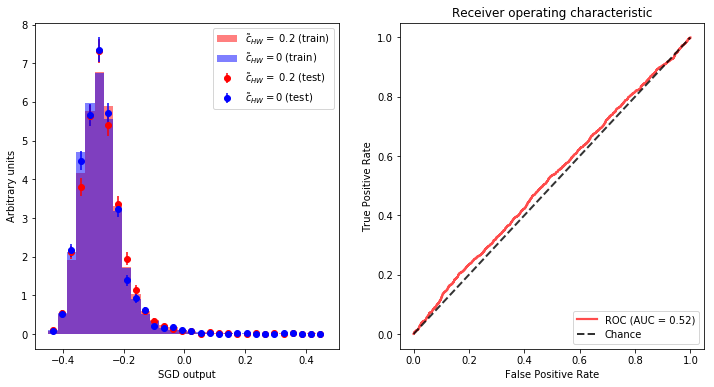

In [38]:
compare_train_test(clf_best_tcHW_0d2, X_train_tcHW_0d2, y_train_tcHW_0d2, 
                   X_test_tcHW_0d2, y_test_tcHW_0d2, 0.2)

In [39]:
clf_grid_tcHW_0d13 = GridSearchCV(estimator=clf_tcHW_0d13, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_tcHW_0d13.fit(X=X_train_tcHW_0d13,y=y_train_tcHW_0d13)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 1.0036735104669887, 1: 0.99635328204615847},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [40]:
clf_best_tcHW_0d13 = clf_grid_tcHW_0d13.best_estimator_

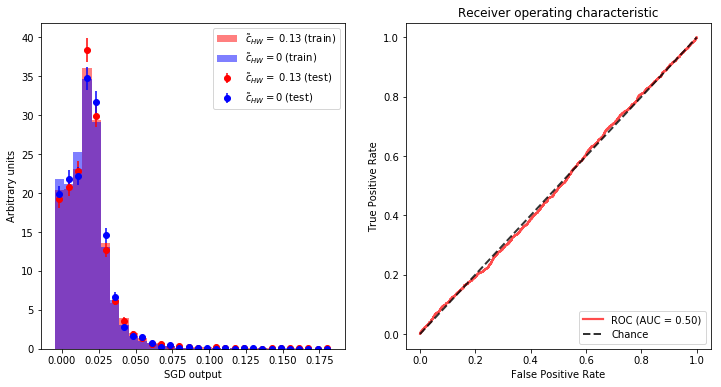

In [41]:
compare_train_test(clf_best_tcHW_0d13, X_train_tcHW_0d13, y_train_tcHW_0d13, 
                   X_test_tcHW_0d13, y_test_tcHW_0d13, 0.13)

In [42]:
clf_grid_tcHW_0d06 = GridSearchCV(estimator=clf_tcHW_0d06, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_tcHW_0d06.fit(X=X_train_tcHW_0d06,y=y_train_tcHW_0d06)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 1.0082774730855169, 1: 0.99185732840443597},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [43]:
clf_best_tcHW_0d06 = clf_grid_tcHW_0d06.best_estimator_

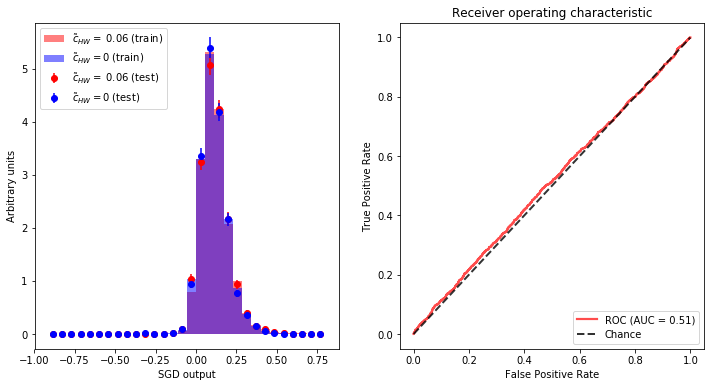

In [44]:
compare_train_test(clf_best_tcHW_0d06, X_train_tcHW_0d06, y_train_tcHW_0d06, 
                   X_test_tcHW_0d06, y_test_tcHW_0d06, 0.06)

In [45]:
clf_grid_tcHW_m0d2 = GridSearchCV(estimator=clf_tcHW_m0d2, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_tcHW_m0d2.fit(X=X_train_tcHW_m0d2,y=y_train_tcHW_m0d2)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 1.0066518847006651, 1: 0.99343544857768051},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [46]:
clf_best_tcHW_m0d2 = clf_grid_tcHW_m0d2.best_estimator_

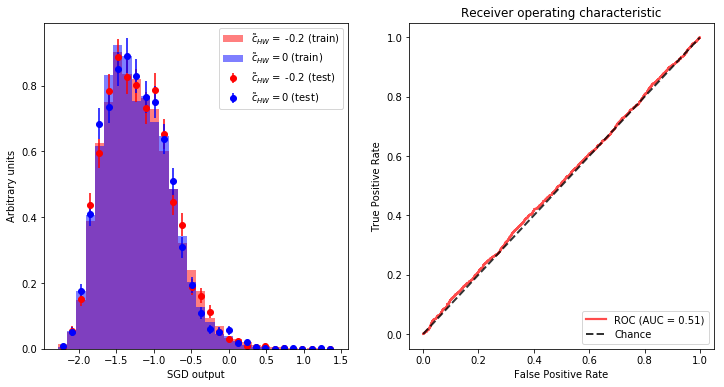

In [47]:
compare_train_test(clf_best_tcHW_m0d2, X_train_tcHW_m0d2, y_train_tcHW_m0d2, 
                   X_test_tcHW_m0d2, y_test_tcHW_m0d2, -0.2)

In [48]:
clf_grid_tcHW_m0d13 = GridSearchCV(estimator=clf_tcHW_m0d13, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_tcHW_m0d13.fit(X=X_train_tcHW_m0d13,y=y_train_tcHW_m0d13)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 0.99899467176032974, 1: 1.0010073536818778},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [49]:
clf_best_tcHW_m0d13 = clf_grid_tcHW_m0d13.best_estimator_

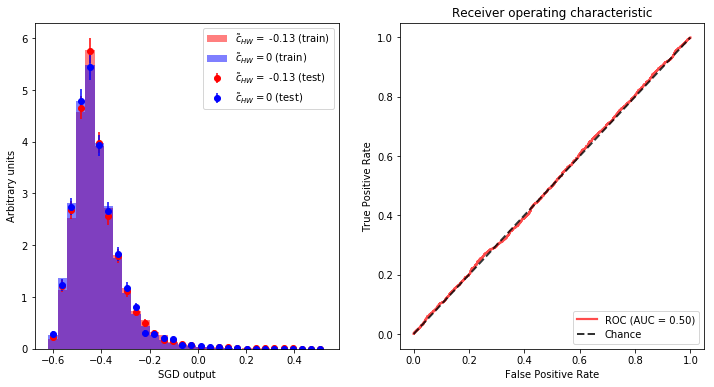

In [50]:
compare_train_test(clf_best_tcHW_m0d13, X_train_tcHW_m0d13, y_train_tcHW_m0d13, 
                   X_test_tcHW_m0d13, y_test_tcHW_m0d13, -0.13)

In [51]:
clf_grid_tcHW_m0d06 = GridSearchCV(estimator=clf_tcHW_m0d06, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_tcHW_m0d06.fit(X=X_train_tcHW_m0d06,y=y_train_tcHW_m0d06)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 1.0001006339941632, 1: 0.99989938625616259},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [52]:
clf_best_tcHW_m0d06 = clf_grid_tcHW_m0d06.best_estimator_

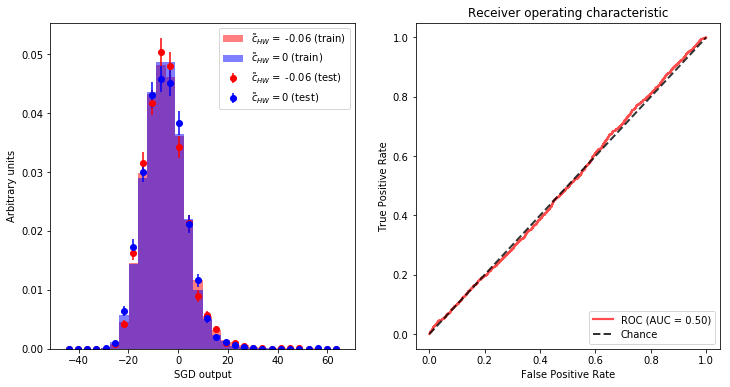

In [53]:
compare_train_test(clf_best_tcHW_m0d06, X_train_tcHW_m0d06, y_train_tcHW_m0d06, 
                   X_test_tcHW_m0d06, y_test_tcHW_m0d06, -0.06)